# Health Insurance Charges

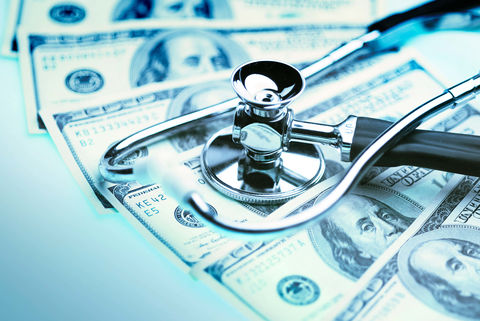

In [106]:
from IPython.display import Image
Image(filename='healthcare_costs.jpg', width = 600)

### The data set that I will be analyzing for this report is about medical insurance charges for people in four different regions in the US. I retrieved this data set from Kaggle. Unfortunately, the year in which this data was gathered is not specified, but it should be recent as the data was updated 6 months ago. 

### The data set includes age, sex, BMI(body mass index), number of children, smoker/nonsmoker, region, and the charges of medical insurance. I chose this data because I know that in the US, medical costs are expensive, so I hope to analyze this data to see what are the factors that lead to higher medical costs and to determine how we can avoid high medical insurance costs.


### In this report, I will answer the following questions:
### 1. Who pays the most for health insurance?
### 2. What contributes to the higher insurance charges?
### 3. Does living in a different region make a difference in insurance costs?


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KernelDensity

In [4]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 1) Who pays the most for medical insurance? 

### First lets compare medical charges between males and females.

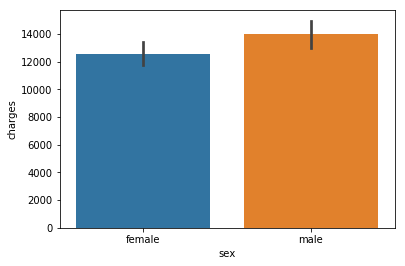

In [58]:
sns.barplot(x='sex', y ='charges', data = df )

### We can see in the bar chart above, that on average males pay more than females. 
### Why is that? Let's look at the mean and standard deviation values of this data set.

In [35]:
df.groupby('sex').aggregate(np.mean) 

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [53]:
df.groupby('sex').aggregate(np.std) 

,age,bmi,children,charges
sex,,,,
female,14.054223,6.046023,1.192115,11128.703801
male,14.050141,6.140435,1.218986,12971.025915


### From the tables above, we can see the mean and std. deviation values for  age, bmi, and number of children are about the same for both males and females. Let's analyze this data more precisely to see what is causing males to pay more for health insurance.

In [37]:
df.nlargest(15, 'charges')

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


###  Here we have the top 15 individuals from the data set and we see that 6 are female and 9 are male. We also see that a female individual has the highest healthcare charges. What these 15 people have in common is that they are all smokers with high BMI percentages.

### Lets compare the charges for males and female again by catergorizing them into two groups: smokers and non smokers. 

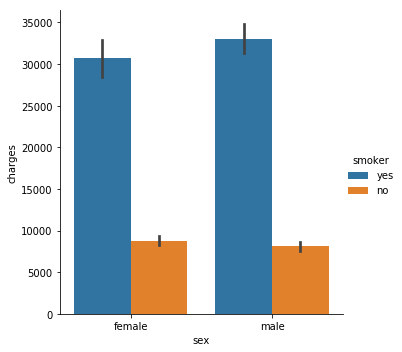

In [59]:
sns.catplot(x="sex", y="charges", hue="smoker", kind="bar", data=df)

### On average, we see that males smokers have the highest charges in health insurance. We also see that between nonsmokers, females have slightly higher insurance charges than males. So the main factor that causes higher costs in medical insurance is being a smoker.

### Let's check the significance in difference between these values by using a t-test. Our null hypothesis is that there is no significant difference in charges between smokers and nonsmokers.

Text(0,0.5,'Frequency')

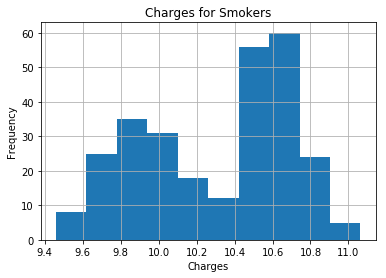

In [96]:
smoker_charges = df[df.smoker == 'yes'].charges
np.log(smoker_charges).hist()
plt.title('Charges for Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [103]:
scipy.stats.normaltest(np.log(smoker_charges))

NormaltestResult(statistic=182.4298839771669, pvalue=2.4313866468822615e-40)

Text(0,0.5,'Frequency')

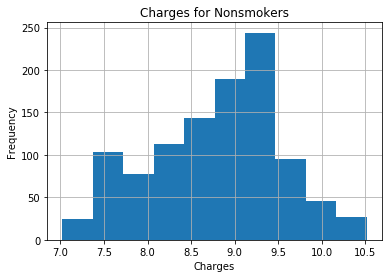

In [97]:
nonsmoker_charges = df[df.smoker == 'no'].charges
np.log(nonsmoker_charges).hist()
plt.title('Charges for Nonsmokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

### As we can see, the data above for the charges for smokers is not normally distributed. I used a normal test to check the probability of the data being normally distributed, but we get a small p-value which means the distribution is not normal.

### Since the data is not normally distributed for the smoker charges, we will use a Mann Whitney U test to test our hypothesis that there is a difference in mean charges between smokers and nonsmokers.


In [74]:
scipy.stats.mannwhitneyu(smoker_charges, nonsmoker_charges)

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

### From the results above, we see that we get a very small p-value. We reject our null hypothesis and can conclude that there is a significant difference in charges between smokers and nonsmokers.

## 2) What else could contribute to these higher charges in medical insurance? bmi? age? children?


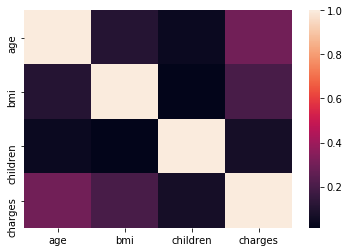

In [7]:
sns.heatmap(df.corr())

### The heatmap above shows us that there is weak correlation between number of children and charges, but there is a stronger correlation between age  and charges and BMI and charges.

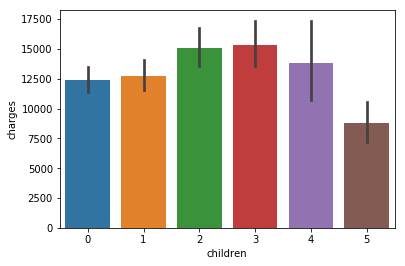

In [132]:
sns.barplot(x='children', y ='charges', data = df )

### The bar chart above shows us that children do not a signficant effect on the costs of medical insurance. We can use a t-test to test this hypothesis.

Text(0,0.5,'Frequency')

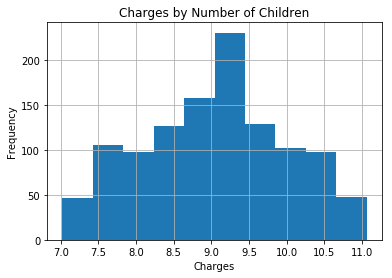

In [26]:
less_children = df[df.children < 4].charges 
np.log(less_children).hist()
plt.title('Charges by Number of Children')
plt.xlabel('Charges')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

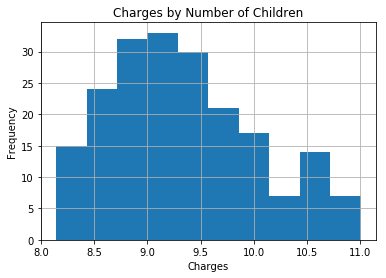

In [27]:
more_children = df[df.children > 3].charges
np.log(more_children).hist()
plt.title('Charges by Number of Children')
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [99]:
less_children = df[df.children < 4].charges 
more_children = df[df.children > 3].charges
scipy.stats.ttest_ind(np.log(less_children), np.log(more_children))

Ttest_indResult(statistic=-0.8011051857312919, pvalue=0.42321319972533367)

### In order to normalize the distributions of the number of children, I divided the inviduals into two groups: less_children( less than 4 children) and more_children(more than 3).
### I used log to normalize the distrbutions and then used a t-test to test our hypothesis. We got a p-value of 0.42, which high enough for us to conlude that there is no signficant difference in charges due to the number of children.
### Next, we will focus on BMI.

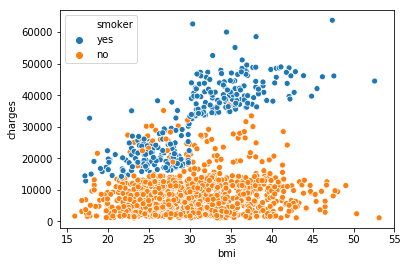

In [8]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue = df['smoker'])


### The scatterplot above shows how much the charges go up depeding on the BMI value for each individual.  To make it a little easier to see the difference, I categorized the inviduals by smokers and nonsmokers.

### Lets look at the distribution of the BMI data in regards to charges by using a histogram.

### I will split the BMI values into two groups: low BMI and high BMI. In the US, normal BMI is considered to be between 24  to  29. So the low BMI value will be the values below 25, and the high BMI values will be anything above 25.

Text(0,0.5,'Frequency')

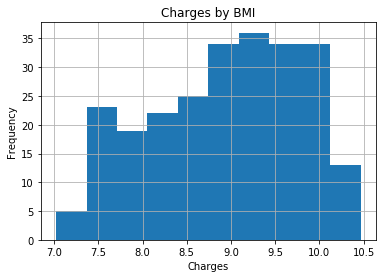

In [56]:
low_bmi = df[df.bmi <25 ].charges
np.log(low_bmi).hist()
plt.title('Charges by BMI')
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [58]:
scipy.stats.normaltest(np.log(low_bmi))

NormaltestResult(statistic=36.55932410702899, pvalue=1.1514461688167045e-08)

Text(0,0.5,'Frequency')

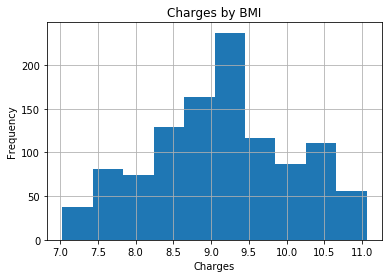

In [57]:
high_bmi = df[df.bmi >= 25 ].charges
np.log(high_bmi).hist()
plt.title('Charges by BMI')
plt.xlabel('Charges')
plt.ylabel('Frequency')

### Above, you will see the histograms for the charges by BMI. I used a log transformation in order to normalize the distributions.
### I will now use a  t-test to in order to test the hypothesis that there is no significant change in health insurance charges between people with low BMI and high BMI.

In [59]:
scipy.stats.ttest_ind(np.log(low_bmi), np.log(high_bmi))

Ttest_indResult(statistic=-3.3161988265454743, pvalue=0.0009370141544589002)

### From our test, we got a small p-value. From this, we can conclude that there is a significant difference in charges between patients with low BMI  and patients with high BMI. This means that people who live a healthier lifestyle will pay less for health insurance.

### Now lets analyze insurance charges by age.

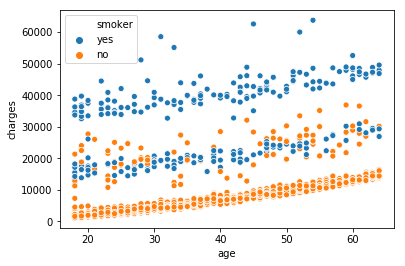

In [38]:
sns.scatterplot(x=df['age'], y=df['charges'], hue = df['smoker'])

### In the scatter plot above, we have the average health insurance charges by age. I also categorized the values by smoker and nonsmoker to better visualize the difference in charges. Overall, health insurance charges increase as a person gets older, but those that are smokers pay a lot more that nonsmokers.

### Let's look at the distributions of the of these values by age by splitting them into two groups. I will used Under 40 for people younger than 40 and Over 40 for people 40 or older.

Text(0,0.5,'Frequency')

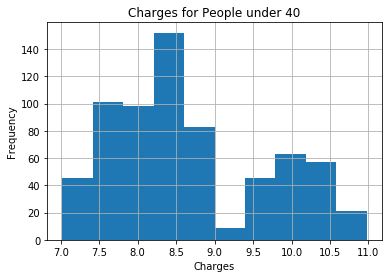

In [100]:
under40_charges = df[df.age < 40].charges
np.log(under40_charges).hist()
plt.title('Charges for People under 40')
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [101]:
scipy.stats.normaltest(np.log(under40_charges))

NormaltestResult(statistic=84.9500775783803, pvalue=3.5754032882892615e-19)

Text(0,0.5,'Frequency')

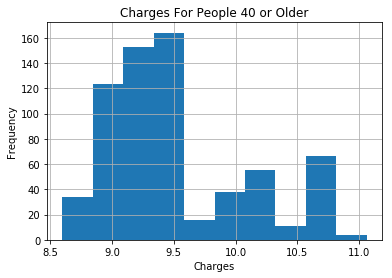

In [91]:
over40_charges = df[df.age >= 40].charges
np.log(over40_charges).hist()
plt.title('Charges For People 40 or Older')
plt.xlabel('Charges')
plt.ylabel('Frequency')

In [102]:
scipy.stats.normaltest(np.log(over40_charges))

NormaltestResult(statistic=69.85873449505516, pvalue=6.76656951831392e-16)

### From the histograms above, we can see that the data is not normally distributed due to the fact that people that are younger will pay less for health insurance. I tried to use a log transformation to normalize the data, but the graphs were still skewed. 

### After using a normal test to check the distributions, we see that we get small p-values which means that it is highly unlikely the the distributions are normal. 

### I will use a Mann Whitney U test in order to determine if there is a difference in mean charges between people that are younger that 40 and 40 and older.

In [45]:
scipy.stats.mannwhitneyu(under40_charges, over40_charges)

MannwhitneyuResult(statistic=103626.0, pvalue=4.023279366656178e-65)

### From our test, we get a very small p-value. From these results, we can conlude that there is a difference in mean charges between people that are younger than 40 and people that are 40 and older.

### So far, we have determined that the factors that contribute to higher medical insurance charges are being a smoker, having high BMI, and age. What about the region? Now we will look at the medical insurance charges based on the region that people live in.

## 3) Does living in different regions affect insurance costs?

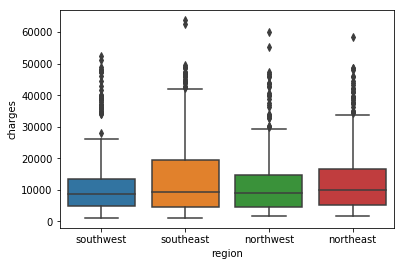

In [48]:
sns.boxplot(x='region', y ='charges', data = df )

### Above we have a box plot in order to compare mean charges values between the four regions. By looking at this graph, we see that on average, people that live in the Southeast region pay the most for medical insurance. The other three regions are pretty close in their values.

### We will separate these values into two groups: Southeast Charges and Not Southeast Charges. The we will use a histogram to display the frequency in charges for both groups.

In [32]:
southeast_charges = df[df.region == 'southeast'].charges
notsoutheast_charges = df[df.region != 'southeast'].charges

Text(0,0.5,'Frequency')

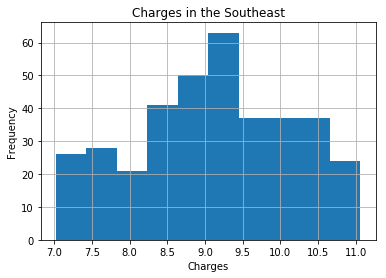

In [33]:
np.log(southeast_charges).hist()
plt.title('Charges in the Southeast')
plt.xlabel('Charges')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

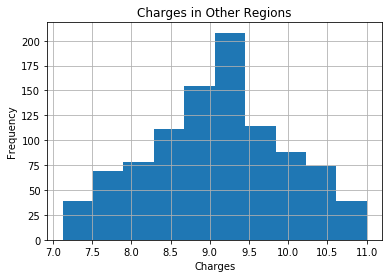

In [34]:
np.log(notsoutheast_charges).hist()
plt.title('Charges in Other Regions')
plt.xlabel('Charges')
plt.ylabel('Frequency')

### Above, we have the histograms for the Southeast Charges and Not Southeast Charges. In order to normalize the skewed distributions, I used a log transformation which resulted in a more normalized distribution of the charges by region. 

### Now we will use a t-test to check if there is a difference in mean charges between the Southeast and the other three regions.

In [37]:
scipy.stats.ttest_ind(np.log(southeast_charges), np.log(notsoutheast_charges))

Ttest_indResult(statistic=0.5772430251577816, pvalue=0.5638725529682811)

### Looking at the results from our t-test, we can see that we get a p-value of 0.56. We can conclude that there is no significant difference in mean health insurance charges between the Southeast and the other regions.

### This means no matter what region you live in, the medical insurance costs should not change significantly.

## Conclusion

### After analyzing this data set, we can conclude that that the main factors that lead to higher charges in health insurance are being a smoker, havinng high BMI, and age. Unfortunately, we cannot control our age, but being a smoker and high BMI are things that can changed or lowered which could possibly lead to lower charges in health insurance.

## Research Proposal

### In order to conduct further research on this data, I would like conduct an experiment on a sample group in order to see if there would be a significant change in health insurance charges if the sample group were to stop smoking and live a healthier lifestyle in order to lower their BMI. I could use regression analysis to predict the amount of time it would take for  an individual to lower their health insurance charges and then compare the regression line to the actual data in a scatter plot to see if there would be a significant change in health insurance charges.